In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

In [2]:
df = pd.read_csv('../data/traffic_ca_2020.csv') # change to github url
df['Hour'] = pd.to_datetime(df['Hour'], format='%H:%M').dt.hour
df = df[df['Day'].isin([2,3,4,5,6])]
df = df.groupby('Hour')['Traffic'].mean().to_frame().reset_index()

In [3]:
# or


In [4]:
X = df.values

In [5]:
gmm = GaussianMixture(n_components=2, random_state=0)
gmm.fit(X)

GaussianMixture(n_components=2, random_state=0)

In [6]:
def generate_trip_start_times(gmm, num_trips, random_state=None):

    # if random_state is not None:
    #     np.random.seed(random_state)
    
    # Generate samples from the GMM
    samples, _ = gmm.sample(n_samples=num_trips)
    
    # Ensure samples are within [0, 24) range
    samples = samples % 24
    
    return samples.flatten()

(array([ 4.,  6., 12.,  8.,  6., 10.,  8.,  7., 11., 16.,  7., 13.,  6.,
        17., 13., 13.,  5.,  8.,  5.,  4.,  4.,  4.,  5.,  8.]),
 array([ 0.06854793,  1.04403397,  2.01952001,  2.99500605,  3.97049209,
         4.94597813,  5.92146416,  6.8969502 ,  7.87243624,  8.84792228,
         9.82340832, 10.79889436, 11.7743804 , 12.74986644, 13.72535248,
        14.70083852, 15.67632456, 16.65181059, 17.62729663, 18.60278267,
        19.57826871, 20.55375475, 21.52924079, 22.50472683, 23.48021287]),
 <BarContainer object of 24 artists>)

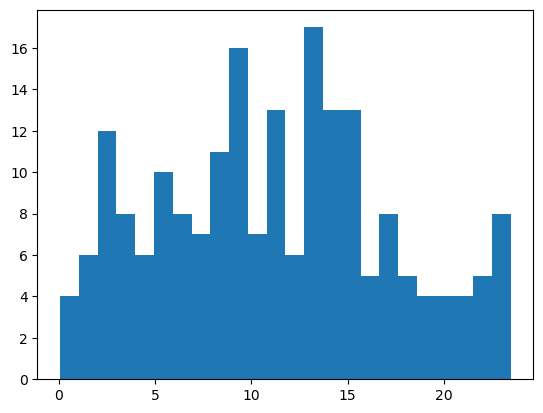

In [55]:
x = generate_trip_start_times(gmm, 100)
plt.hist(x,bins=24)